In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
#Read file
list_filename="gspy-db-20180813_filtered.csv"

In [3]:
data_dir = os.path.join(os.path.dirname(os.getcwd()),"data")
data_dir

'/Users/agata/VIRGO/2019BragaSchool-gwhandson/data'

In [4]:
gl_df = pd.read_csv(os.path.join(data_dir,list_filename))

### Select only O1 GPS times from this list

In [5]:
O1start = 1126051217
O1end = 1137254417
gl_df_sel = gl_df[(gl_df["GPStime"]>O1start) & (gl_df["GPStime"]<O1end)]

In [6]:
print("selected %d out of %d glitches" % (len(gl_df_sel),len(gl_df)))

selected 13185 out of 81701 glitches


In [7]:
print("Details of the first 10 elements of the table")
gl_df_sel.sample(10)

Details of the first 10 elements of the table


,Index,GPStime,peakFreq,snr,amplitude,centralFreq,duration,bandwidth,chisq,chisqDof,confidence,id,ifo,label,imgUrl
51018,51018,1.129332e+09,43.057,7.716,1.710000e-22,65.381,0.500,48.028042,0.0,0.0,0.999,hEQ9NQWBUi,L1,Scattered_Light,https://ldas-jobs.ligo-la.caltech.edu/~scoughl...
428,428,1.126547e+09,59.089,12.738,1.660000e-21,60.527,0.563,24.528191,0.0,0.0,1.000,SmkwxO28di,H1,Power_Line,https://ldas-jobs.ligo-wa.caltech.edu/~scoughl...
1043,1043,1.128457e+09,190.779,7.848,5.300000e-23,171.624,0.609,156.213943,0.0,0.0,1.000,5vKuNJxfGP,H1,Scratchy,https://ldas-jobs.ligo-wa.caltech.edu/~scoughl...
76052,76052,1.132664e+09,89.676,14.426,4.350000e-22,291.364,0.188,527.595764,0.0,0.0,0.997,WrpT5GAumQ,H1,Blip,https://ldas-jobs.ligo-wa.caltech.edu/~scoughl...
39631,39631,1.135941e+09,29.616,11.405,3.360000e-22,2081.403,1.875,4118.316895,0.0,0.0,1.000,mW5WfM3P9r,H1,Scattered_Light,https://ldas-jobs.ligo-wa.caltech.edu/~scoughl...
43900,43900,1.135279e+09,18.434,8.336,1.650000e-21,2651.329,1.500,5269.805176,0.0,0.0,1.000,J0ZVku7zuq,H1,Low_Frequency_Lines,https://ldas-jobs.ligo-wa.caltech.edu/~scoughl...
75559,75559,1.134295e+09,21.128,7.553,6.850000e-22,21.708,1.250,3.321320,0.0,0.0,0.997,bqcoppo8c9,L1,Low_Frequency_Lines,https://ldas-jobs.ligo-la.caltech.edu/~scoughl...
27499,27499,1.136406e+09,89.676,18.338,5.210000e-22,3263.159,3.500,6511.093262,0.0,0.0,1.000,Xg6LROtV9Z,H1,Light_Modulation,https://ldas-jobs.ligo-wa.caltech.edu/~scoughl...
32169,32169,1.135066e+09,170.654,33.169,1.150000e-21,1564.849,0.234,3045.034668,0.0,0.0,1.000,R1pcMlWqgp,H1,Repeating_Blips,https://ldas-jobs.ligo-wa.caltech.edu/~scoughl...
56043,56043,1.130195e+09,17.597,138.490,8.110000e-20,2646.922,4.000,5278.620117,0.0,0.0,0.999,csMmpSZBcz,L1,Low_Frequency_Burst,https://ldas-jobs.ligo-la.caltech.edu/~scoughl...


#### In the next lines an example on how to download a piece of data around the glitch GPS time, save it into a hdf5 file and then open the hdf5 file 

In [8]:
#I choose one glitch that is easy to spot in the timeseries
GPS = gl_df_sel.GPStime[21]
ifo = gl_df_sel.ifo[21]
print ("Downloading data around the GPS time",GPS,"for the detector",ifo)
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data(ifo, GPS-2, GPS+2)

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


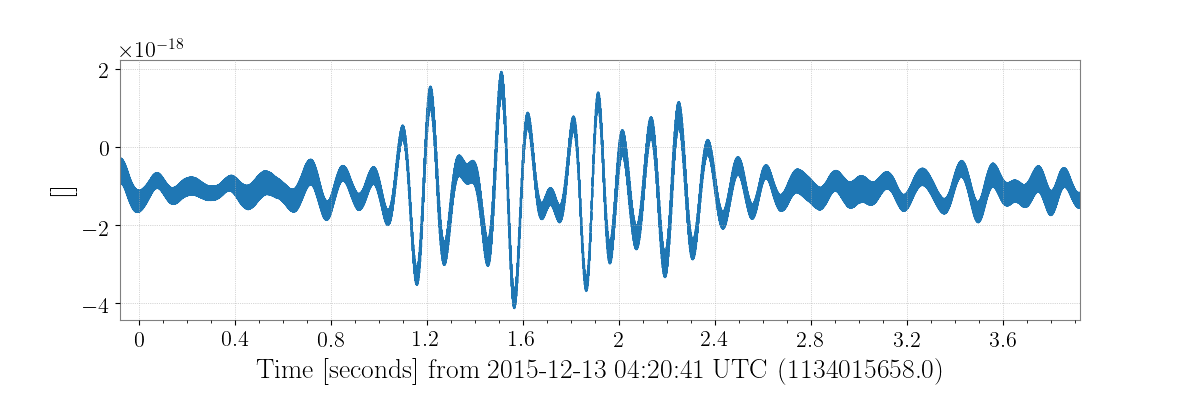

In [22]:
plot = data.plot()

Now I save the data in a hdf5 file

In [11]:
import h5py

In [12]:
hdf5_filename = "example.hdf5"
h5=h5py.File(os.path.join(data_dir,hdf5_filename), 'w')

In [13]:
#I store the important quatities in the file
s = h5.create_group('Strain')
meta_s = s.create_dataset('Strain', data=data.value, compression='gzip', compression_opts=1, fletcher32=True)
meta_s.attrs['GPSstart'] = GPS-2
meta_s.attrs['GPSend'] = GPS+2
meta_s.attrs['Sample_Rate'] = 1./data.dt
meta_s.attrs['Ifo'] = ifo
h5.close()

In [14]:
#as an example I open the file and read it
data_file = h5py.File(os.path.join(data_dir,hdf5_filename))

In [15]:
strain = data_file['Strain']['Strain'].value
GPSstart = data_file['Strain']['Strain'].attrs['GPSstart']
GPSend = data_file['Strain']['Strain'].attrs['GPSend']
Sample_Rate = data_file['Strain']['Strain'].attrs['Sample_Rate']
Ifo = data_file['Strain']['Strain'].attrs['Ifo']

In [16]:
print ('GPSstart',GPSstart)
print ('GPSend',GPSend)
print ('Sample_Rate',Sample_Rate)
print ('Ifo',Ifo)

GPSstart 1134015657.92
GPSend 1134015661.92
Sample_Rate 4096.0
Ifo L1


In [17]:
#now I plot the strain from the file
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [19]:
ts = 1./Sample_Rate
half = (GPSend-GPSstart)/2.
time = np.arange(-half,half,ts)

Text(0.5, 0, 'GPS Time since 1134015659.92 [s]')

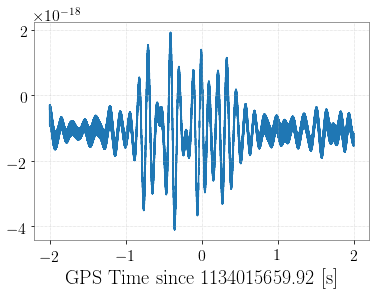

In [20]:
plt.plot(time,strain)
plt.xlabel('GPS Time since '+str(GPSstart+half)+' [s]')